In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore, skew, kurtosis

In [4]:
df = pd.read_csv('house_price.csv')

In [5]:
# 1) Perform basic EDA
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB
None
         total_sqft          bath         price           bhk  price_per_sqft
count  13200.000000  13200.000000  13200.000000  13200.000000    1.320000e+04
mean    1555.302783      2.691136    112.276178      2.800833    7.920337e+03
std     1237.323445      1.338915    149.175995      1.292843    1.067272e+05
min        1.000000      1.000000      8.000000      1.000000    2.670000e+02
25%     1100.000000      2.0

In [6]:
# 2) Outlier Detection and Removal
# a) Mean and Standard Deviation
mean = df['price_per_sqft'].mean()
std = df['price_per_sqft'].std()
df_std = df[(df['price_per_sqft'] >= mean - 3 * std) & (df['price_per_sqft'] <= mean + 3 * std)]

In [7]:
# b) Percentile Method
lower_percentile = df['price_per_sqft'].quantile(0.05)
upper_percentile = df['price_per_sqft'].quantile(0.95)
df_percentile = df[(df['price_per_sqft'] >= lower_percentile) & (df['price_per_sqft'] <= upper_percentile)]

In [8]:
# c) IQR Method
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1
df_iqr = df[(df['price_per_sqft'] >= Q1 - 1.5 * IQR) & (df['price_per_sqft'] <= Q3 + 1.5 * IQR)]


In [9]:
# d) Z-Score Method
df['z_score'] = zscore(df['price_per_sqft'])
df_zscore = df[(df['z_score'] >= -3) & (df['z_score'] <= 3)]


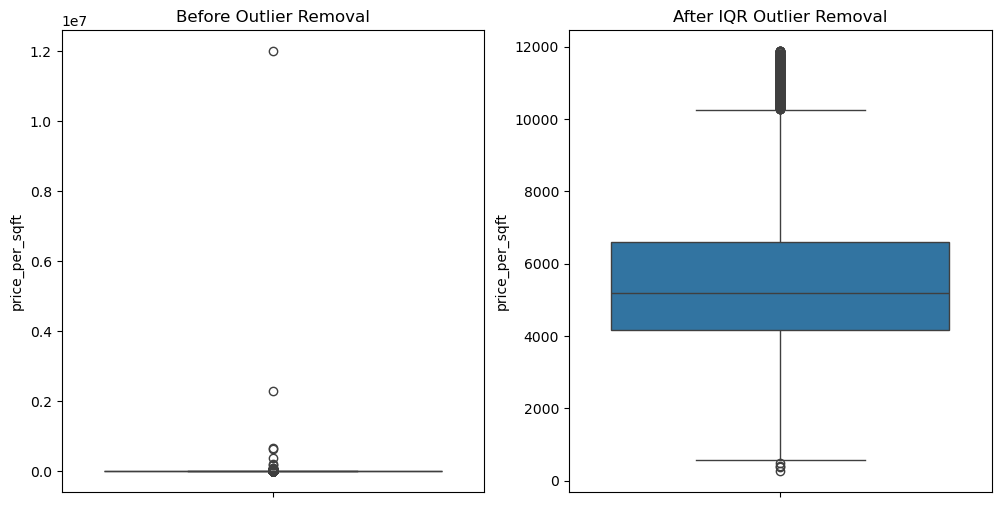

In [10]:
# 3) Box Plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(df['price_per_sqft'])
plt.title('Before Outlier Removal')

plt.subplot(1, 2, 2)
sns.boxplot(df_iqr['price_per_sqft'])
plt.title('After IQR Outlier Removal')
plt.show()

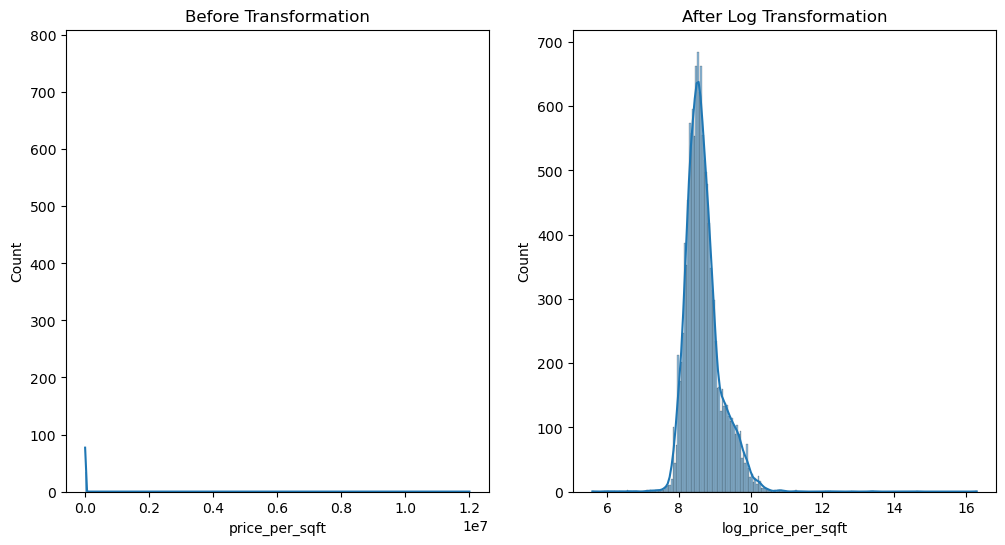

In [13]:
# 4) Histogram and Transformations
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['price_per_sqft'], kde=True)
plt.title('Before Transformation')

# Log Transformation
df['log_price_per_sqft'] = np.log(df['price_per_sqft'] + 1)
plt.subplot(1, 2, 2)
sns.histplot(df['log_price_per_sqft'], kde=True)
plt.title('After Log Transformation')
plt.show()

# Skewness and Kurtosis
print("Skewness Before:", skew(df['price_per_sqft']))
print("Kurtosis Before:", kurtosis(df['price_per_sqft']))
print("Skewness After:", skew(df['log_price_per_sqft']))
print("Kurtosis After:", kurtosis(df['log_price_per_sqft']))


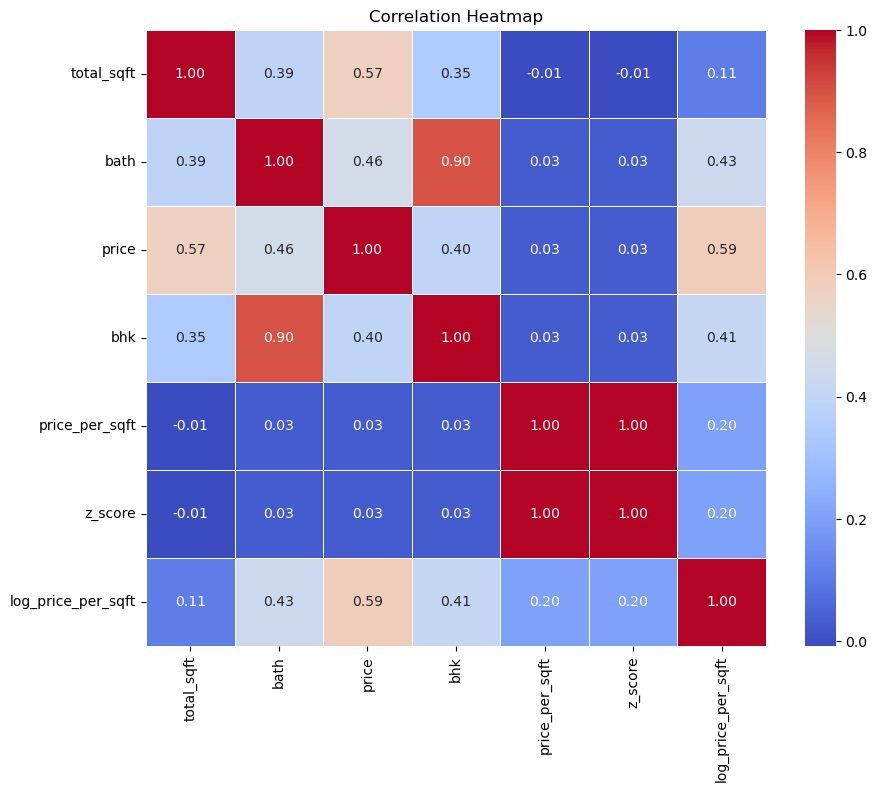

In [15]:
# 5) Correlation and Heatmap
corr_matrix = df.select_dtypes(include=['number']).corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Heatmap')
plt.show()


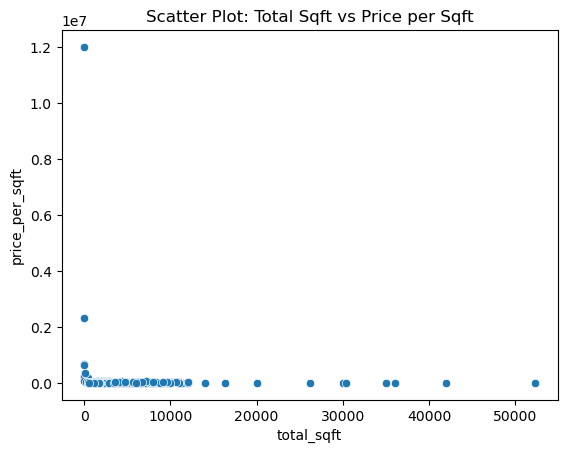

In [16]:
# 6) Scatter Plot
sns.scatterplot(x='total_sqft', y='price_per_sqft', data=df)
plt.title('Scatter Plot: Total Sqft vs Price per Sqft')
plt.show()